<a href="https://www.kaggle.com/code/mennatallah77/stroke-prediction-with-99-accuracy?scriptVersionId=168046989" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Attribute Information
* ***id: unique identifier***
* ***gender: "Male", "Female" or "Other"***
* ***age: age of the patient***
* ***hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension***
* ***heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease***
* ***ever_married: "No" or "Yes"***
* ***work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"***
* ***Residence_type: "Rural" or "Urban"***
* ***avg_glucose_level: average glucose level in blood***
* ***bmi: body mass index  => weight in kilograms / the square of height in meters***
* ***smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"***
* ***stroke: 1 if the patient had a stroke or 0 if not***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

# *Quick peek on data*

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


***Dropping the id***

In [4]:
data.drop('id',axis=1,inplace=True) 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Figure size 1000x600 with 0 Axes>

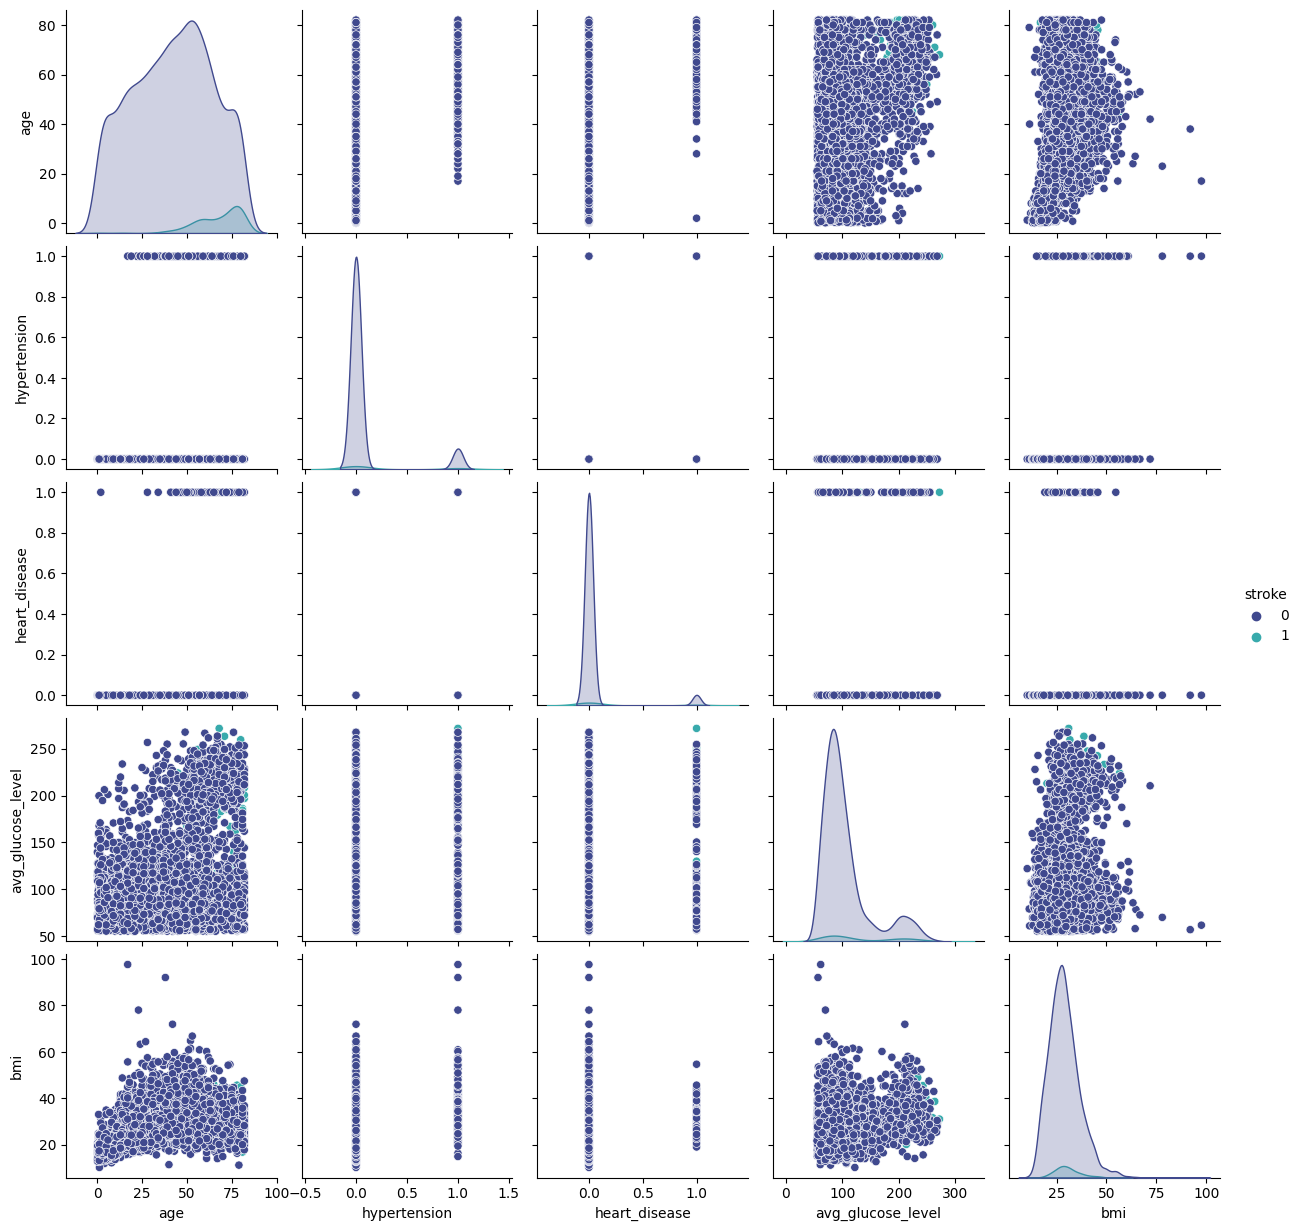

In [7]:
plt.figure(figsize=(10,6))
sns.pairplot(data,hue='stroke',palette='mako')

***Checking duplication and nulls***

In [8]:
data.duplicated().any()

False

In [9]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

***Only bmi has nulls***

In [10]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

# *Dealing with all the numerical features(nulls/scailing)*

In [11]:
numerical = data.select_dtypes(include=['int64','float64']).columns.tolist()
numerical

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

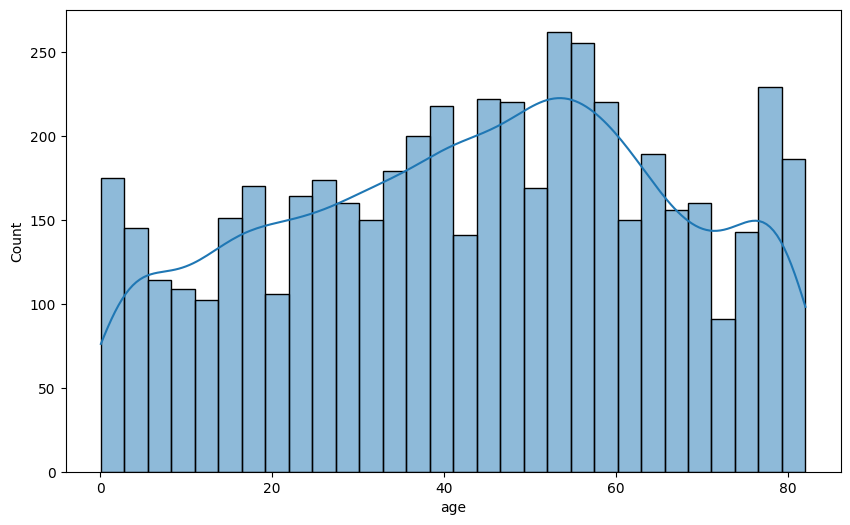

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(data.age,kde=True,bins=30)

In [13]:
data.age[data.age < 1].value_counts()

age
0.88    5
0.32    5
0.24    5
0.72    5
0.56    5
0.64    4
0.80    4
0.48    3
0.16    3
0.40    2
0.08    2
Name: count, dtype: int64

***Is that a mistake let's check***

In [14]:
data[data.age < 1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
564,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
982,Male,0.88,0,0,No,children,Rural,157.57,19.2,Unknown,0
996,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
1093,Female,0.32,0,0,No,children,Rural,55.86,16.0,Unknown,0
1206,Female,0.72,0,0,No,children,Urban,66.36,23.0,Unknown,0
1317,Male,0.80,0,0,No,children,Rural,98.67,17.5,Unknown,0
1600,Male,0.40,0,0,No,children,Urban,109.56,14.3,Unknown,0
1614,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


In [15]:
data.work_type[data.age < 1] == 'children'

363     True
376     True
564     True
982     True
996     True
1093    True
1206    True
1317    True
1600    True
1614    True
1808    True
1975    True
1999    True
2008    True
2012    True
2030    True
2358    True
2481    True
2490    True
2579    True
2630    True
2801    True
2875    True
2898    True
3251    True
3295    True
3392    True
3440    True
3618    True
3626    True
3859    True
3894    True
3968    True
4007    True
4021    True
4053    True
4293    True
4409    True
4581    True
4645    True
4910    True
4929    True
5089    True
Name: work_type, dtype: bool

***It appears that it's not a mistake these are children(infants)***

In [16]:
data.hypertension.value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7c74cc7d00d0>,
 [Text(-1.3348942113978373, 0.42196853481811436, 'No Hypertension'),
  Text(1.1441950298751005, -0.3616873423402018, 'Hypertension')],
 [Text(-0.8581462787557526, 0.2712654866687878, '90.3%'),
  Text(0.6674471007604752, -0.21098428303178438, '9.7%')])

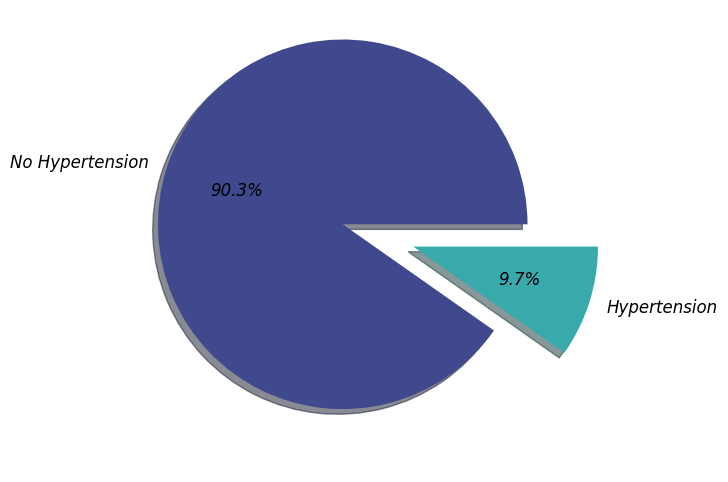

In [17]:
plt.figure(figsize=(10,6))
plt.pie(data.hypertension.value_counts(),labels=['No Hypertension','Hypertension'],autopct='%1.1f%%',
        colors=sns.color_palette('mako',2),explode=(0.3,0.1),shadow=True,textprops={'fontsize':12,'style':'italic'})

In [18]:
data.heart_disease.value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7c74cc7f7460>,
 [Text(-1.3798936980729009, 0.23641781239723444, 'No Heart disease'),
  Text(1.182766015061574, -0.2026439084092213, 'Heart disease')],
 [Text(-0.8870745201897219, 0.1519828793982221, '94.6%'),
  Text(0.6899468421192514, -0.11820894657204575, '5.4%')])

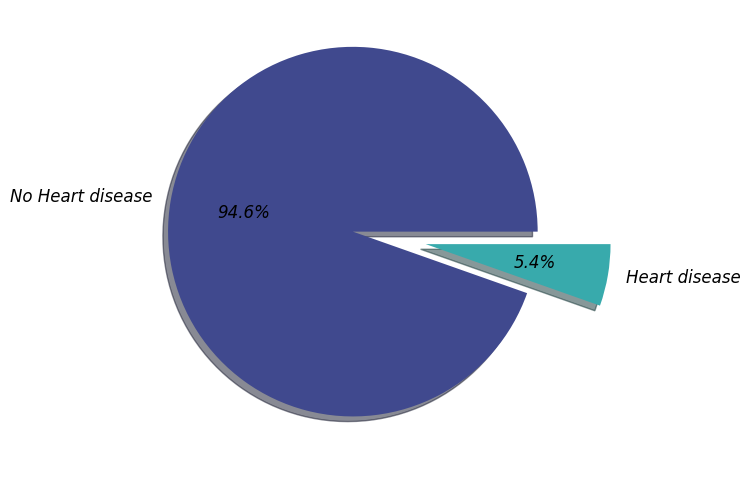

In [19]:
plt.figure(figsize=(10,6))
plt.pie(data.heart_disease.value_counts(),labels=['No Heart disease','Heart disease'],autopct='%1.1f%%',
        colors=sns.color_palette('mako',2),explode=(0.3,0.1),shadow=True,textprops={'fontsize':12,'style':'italic'})

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='avg_glucose_level', ylabel='Count'>

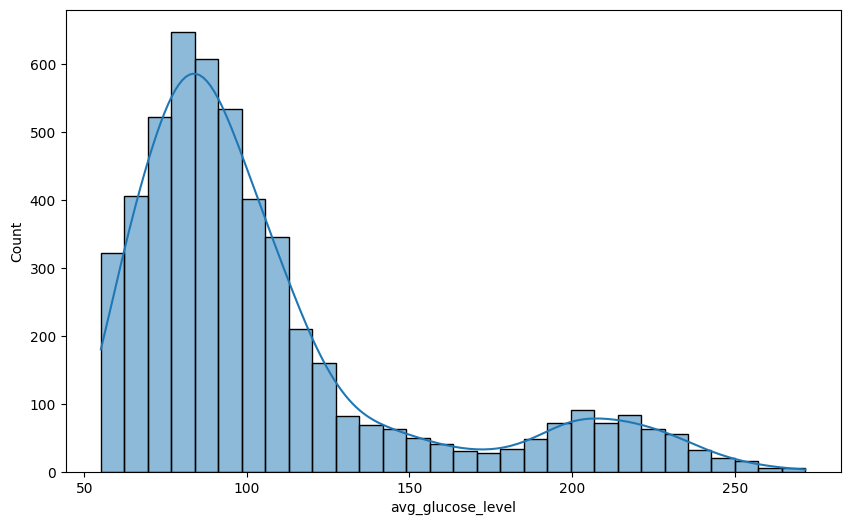

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(data.avg_glucose_level,kde=True,bins=30)

In [21]:
data.avg_glucose_level.describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bmi', ylabel='Count'>

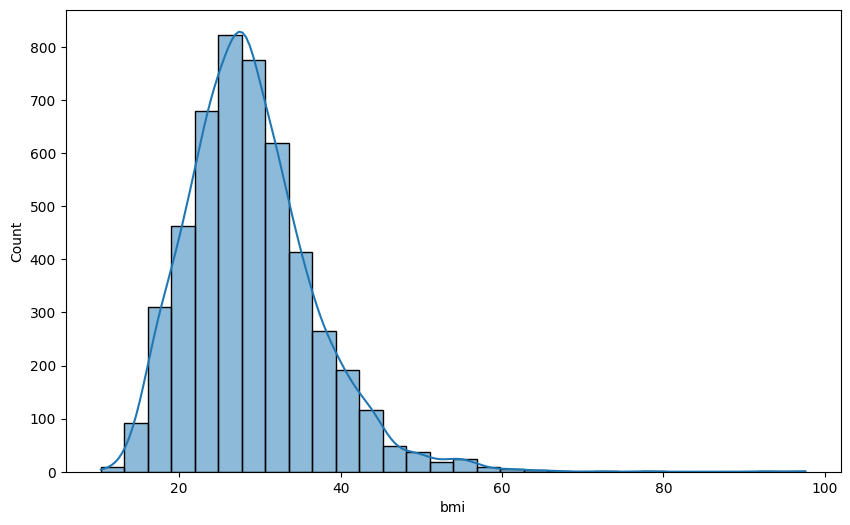

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(data.bmi,kde=True,bins=30)

In [23]:
data.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

***Dealing with the nulls***

In [24]:
data.bmi.fillna(data.bmi.mean(),inplace=True)

/tmp/ipykernel_588/3394024120.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.bmi.fillna(data.bmi.mean(),inplace=True)


***Checking for outliers***

<Axes: >

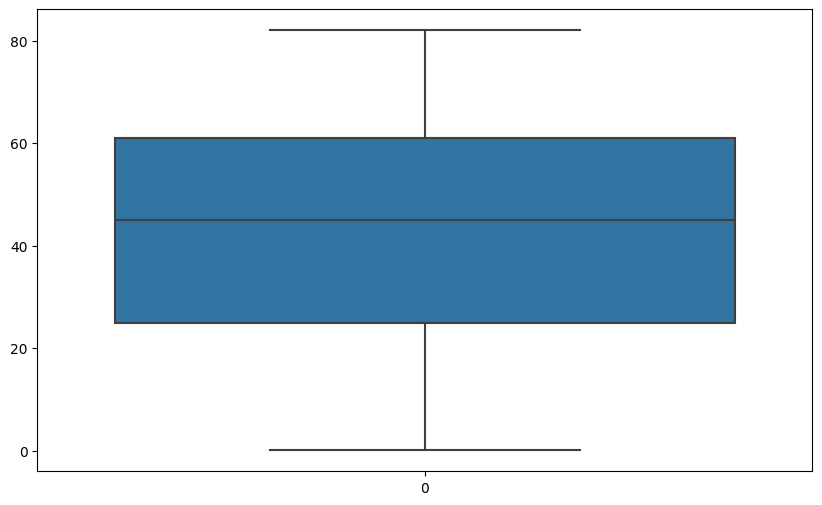

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(data.age)

<Axes: >

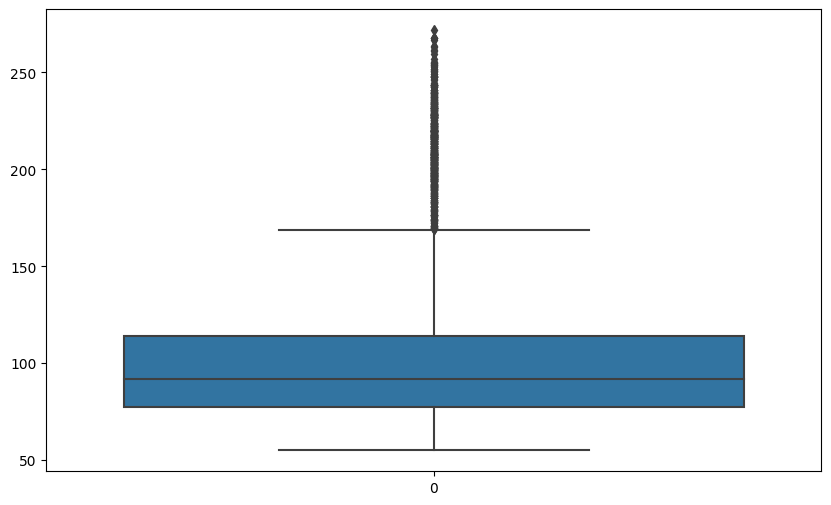

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(data.avg_glucose_level)

<Axes: >

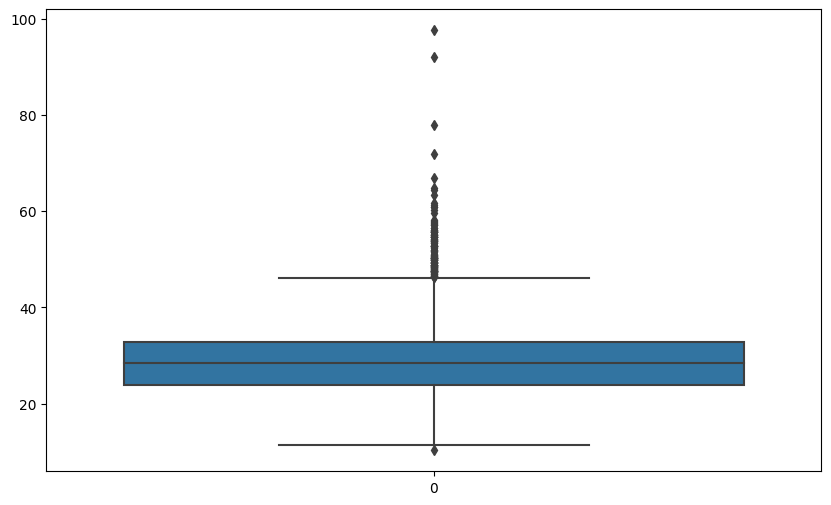

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(data.bmi)

***scalining numerical features***

In [28]:
data[numerical[:-1]] = StandardScaler().fit_transform(data[numerical[:-1]])

In [29]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5110.000000
mean,5.005781e-17,-4.727682e-17,5.561978e-18,1.001156e-16,2.224791e-17,0.048728
std,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,0.215320
min,-1.908261e+00,-3.286019e-01,-2.389468e-01,-1.126958e+00,-2.415564e+00,0.000000
25%,-8.061152e-01,-3.286019e-01,-2.389468e-01,-6.383223e-01,-6.616944e-01,0.000000
50%,7.843218e-02,-3.286019e-01,-2.389468e-01,-3.149945e-01,-6.407951e-02,0.000000
75%,7.860701e-01,-3.286019e-01,-2.389468e-01,1.754080e-01,5.075521e-01,0.000000
max,1.714845e+00,3.043196e+00,4.185032e+00,3.657145e+00,8.926127e+00,1.000000


# *Dealing with all the categorical features(nulls (if exists)/encoding)*

In [30]:
categories = data.select_dtypes(include=['object']).columns.tolist()
categories

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [31]:
data.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

***Dropping the Other as it should be female or male***

In [32]:
data.drop(data[data.gender == 'Other'].index,inplace=True)
data.reset_index(drop=True,inplace=True)

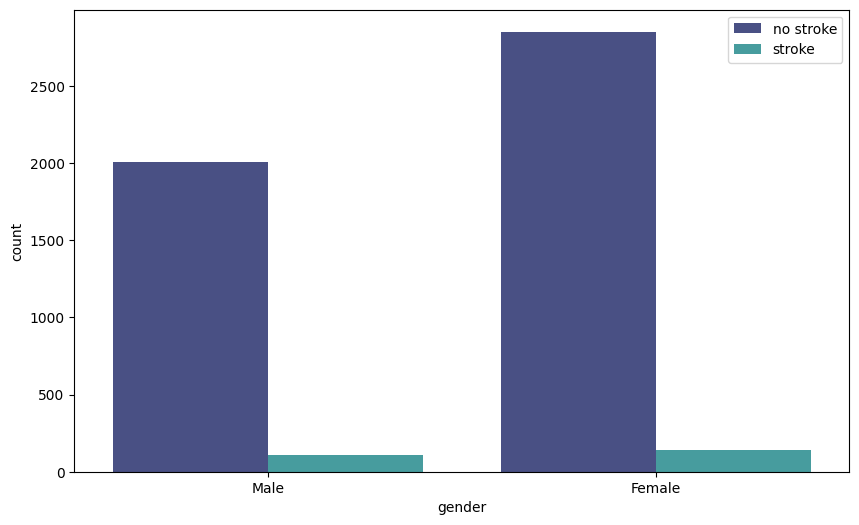

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x="gender", data=data, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])


***Mapping the gender***

In [34]:
data.gender = data.gender.map({'Male':0,'Female':1})

In [35]:
data.ever_married.value_counts()

ever_married
Yes    3353
No     1756
Name: count, dtype: int64

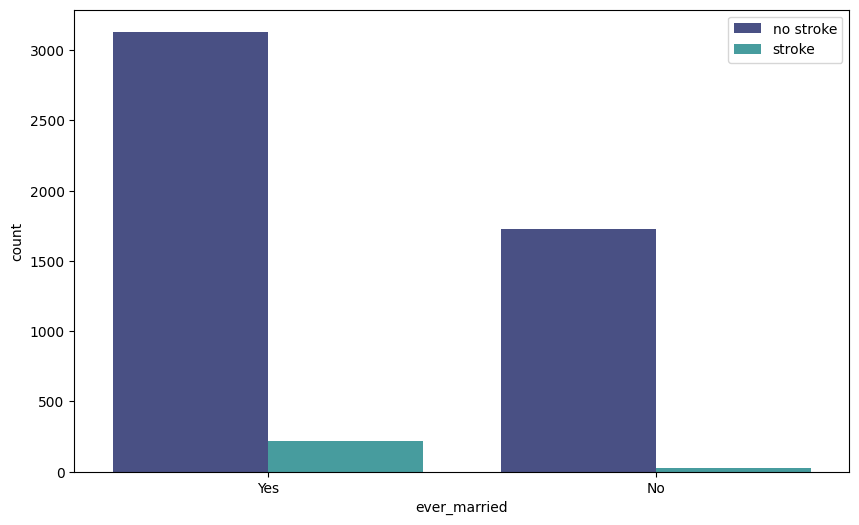

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x="ever_married", data=data, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

***Mapping the ever_married***

In [37]:
data.ever_married = data.ever_married.map({'No':0,'Yes':1})

In [38]:
data.work_type.value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

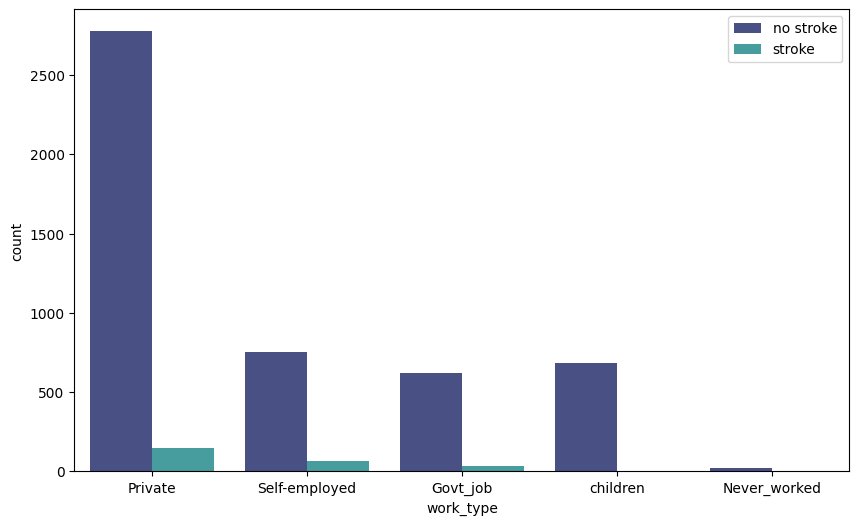

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(x="work_type", data=data, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

***Mapping the work_type***

In [40]:
data.work_type = data.work_type.map({'Private':0,'Self-employed':1,'children':2,'Govt_job':3,'Never_worked':4})

In [41]:
data.Residence_type.value_counts()

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

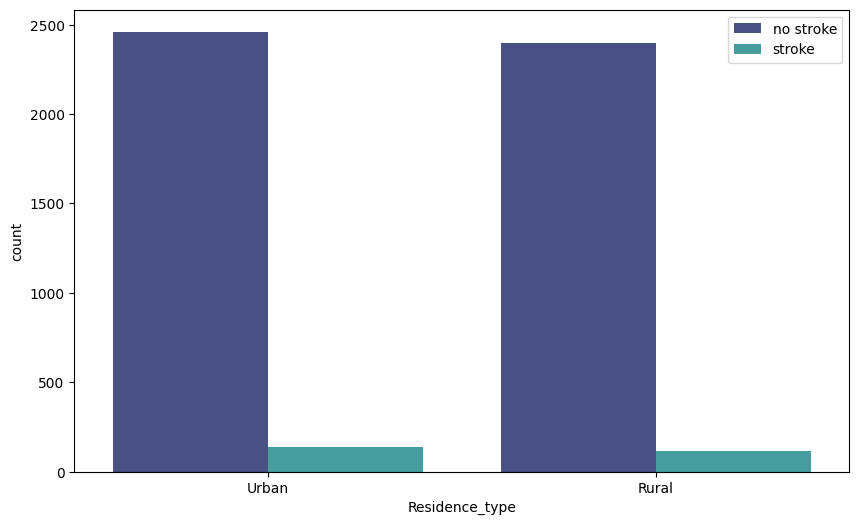

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(x="Residence_type", data=data, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

***Mapping the Residence_type***

In [43]:
data.Residence_type = data.Residence_type.map({'Urban':0,'Rural':1})

In [44]:
data.smoking_status.value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

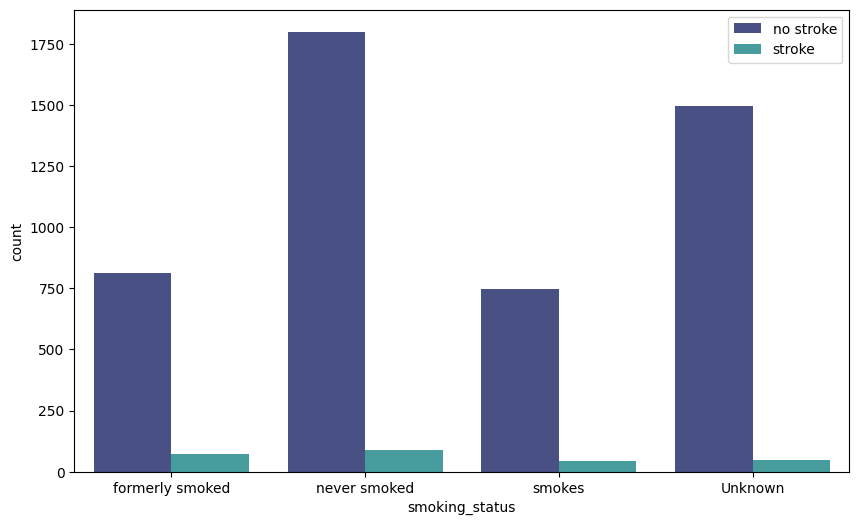

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(x="smoking_status", data=data, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

***Mapping the smoking_status***

In [46]:
data.smoking_status = data.smoking_status.map({'never smoked':0,'formerly smoked':1,'smokes':2,'Unknown':3})

In [47]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,1.051434,-0.328602,4.185032,1,0,0,2.706375,1.001234e+00,1,1
1,1,0.786070,-0.328602,-0.238947,1,1,1,2.121559,4.615554e-16,0,1
2,0,1.626390,-0.328602,4.185032,1,0,1,-0.005028,4.685773e-01,0,1
3,1,0.255342,-0.328602,-0.238947,1,0,0,1.437358,7.154182e-01,2,1
4,1,1.582163,3.043196,-0.238947,1,1,1,1.501184,-6.357112e-01,0,1


***Checking the correlation between the features***

<Axes: >

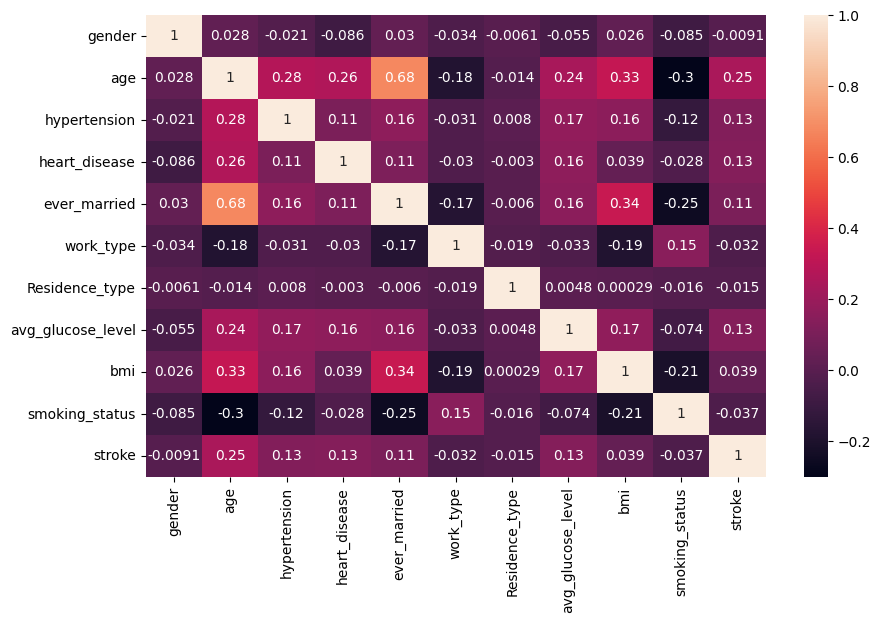

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

In [49]:
X = data.drop('stroke',axis=1)
y = data.stroke
X.shape,y.shape

((5109, 10), (5109,))

In [50]:
y.value_counts()

stroke
0    4860
1     249
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7c74ca0168f0>,
 [Text(-1.3836214247114578, 0.21352225429550808, 'No Stroke'),
  Text(1.1859612190393143, -0.18301908899014838, 'Stroke')],
 [Text(-0.8894709158859372, 0.13726430633282663, '95.1%'),
  Text(0.6918107111062667, -0.10676113524425322, '4.9%')])

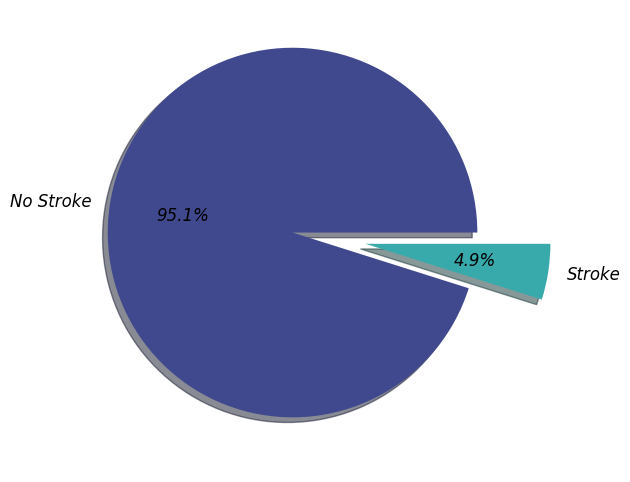

In [51]:
plt.figure(figsize=(10,6))
plt.pie(data.stroke.value_counts(),labels=['No Stroke','Stroke'],autopct='%1.1f%%',
        colors=sns.color_palette('mako',2),explode=(0.3,0.1),shadow=True,textprops={'fontsize':12,'style':'italic'})

***Wow huge impalancing***

# *Balancing the target*

**I will use three techniques:**
1. SMOTE
2. RandomOverSampler
3. RandomUnderSampler

**✨SMOTE (Synthetic Minority Oversampling Technique):**
Creates synthetic data points for the minority class based on existing data points in that class.
This helps increase the representation of the minority class in the training data.

**✨RandomOverSampler:**
Randomly duplicates data points from the minority class to increase its representation.
Unlike SMOTE, it doesn't create synthetic data.

**✨RandomUnderSampler:**
Randomly removes data points from the majority class to reduce its size and match the minority class.
This approach can be faster than oversampling techniques.

In [52]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
ros = RandomOverSampler(sampling_strategy='minority')
X_over_resampled, y_over_resampled = ros.fit_resample(X, y)
rus = RandomUnderSampler(sampling_strategy='majority')
X_under_resampled, y_under_resampled = rus.fit_resample(X, y)


In [53]:
print(X_resampled.shape,y_resampled.shape)
print(X_over_resampled.shape,y_over_resampled.shape)
print(X_under_resampled.shape,y_under_resampled.shape)

(9720, 10) (9720,)
(9720, 10) (9720,)
(498, 10) (498,)


In [54]:
print(y_resampled.value_counts())
print(y_over_resampled.value_counts())
print(y_under_resampled.value_counts())

stroke
1    4860
0    4860
Name: count, dtype: int64
stroke
1    4860
0    4860
Name: count, dtype: int64
stroke
0    249
1    249
Name: count, dtype: int64


# *RandomUnderSampler*

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        78
           1       0.79      0.76      0.77        72

    accuracy                           0.79       150
   macro avg       0.79      0.79      0.79       150
weighted avg       0.79      0.79      0.79       150



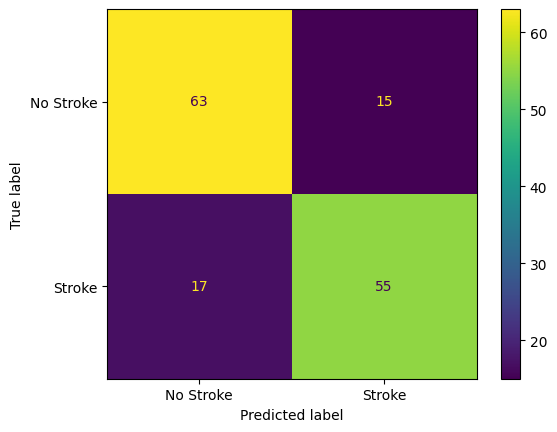

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X_under_resampled,y_under_resampled,test_size=0.3,random_state=42)
model = RandomForestClassifier(random_state=1234)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

# *SMOTE*

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1458
           1       0.90      0.95      0.92      1458

    accuracy                           0.92      2916
   macro avg       0.92      0.92      0.92      2916
weighted avg       0.92      0.92      0.92      2916



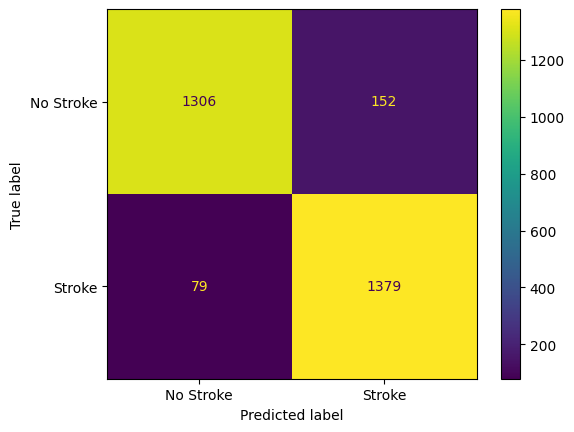

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)
model = RandomForestClassifier(random_state=1234)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

# *RandomOverampler*

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1458
           1       0.98      1.00      0.99      1458

    accuracy                           0.99      2916
   macro avg       0.99      0.99      0.99      2916
weighted avg       0.99      0.99      0.99      2916



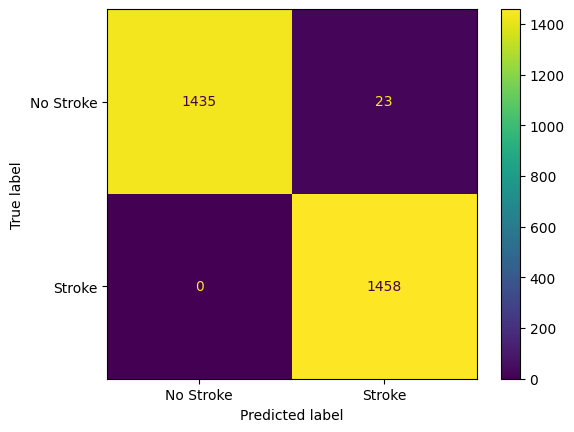

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X_over_resampled,y_over_resampled,test_size=0.3,random_state=42)
model = RandomForestClassifier(random_state=1234)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()